In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt


In [ ]:
data=pd.read_csv("mushrooms.csv",na_values=["?"])
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [ ]:
data['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [ ]:
data['cap-surface'].unique()

array(['s', 'y', 'f', 'g'], dtype=object)

In [ ]:
l=[]
for column in data.columns:
    unique_values = data[column].unique()
    l+=[unique_values.tolist()]
    print(f"Unique values in {column}: {unique_values}")


Unique values in class: ['p' 'e']
Unique values in cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
Unique values in cap-surface: ['s' 'y' 'f' 'g']
Unique values in cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in bruises: ['t' 'f']
Unique values in odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in gill-attachment: ['f' 'a']
Unique values in gill-spacing: ['c' 'w']
Unique values in gill-size: ['n' 'b']
Unique values in gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in stalk-shape: ['e' 't']
Unique values in stalk-root: ['e' 'c' 'b' 'r' nan]
Unique values in stalk-surface-above-ring: ['s' 'f' 'k' 'y']
Unique values in stalk-surface-below-ring: ['s' 'f' 'y' 'k']
Unique values in stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values in stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Unique values in veil-type: ['p']
Unique values in veil-color: ['w' 'n' 'o' 'y']
Unique values in ring-number: ['o' 't' 'n']

[['p', 'e'],
 ['x', 'b', 's', 'f', 'k', 'c'],
 ['s', 'y', 'f', 'g'],
 ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'],
 ['t', 'f'],
 ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'],
 ['f', 'a'],
 ['c', 'w'],
 ['n', 'b'],
 ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
 ['e', 't'],
 ['e', 'c', 'b', 'r', nan],
 ['s', 'f', 'k', 'y'],
 ['s', 'f', 'y', 'k'],
 ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'],
 ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'],
 ['p'],
 ['w', 'n', 'o', 'y'],
 ['o', 't', 'n'],
 ['p', 'e', 'l', 'f', 'n'],
 ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'],
 ['s', 'n', 'a', 'v', 'y', 'c'],
 ['u', 'g', 'm', 'd', 'p', 'w', 'l']]

In [ ]:
unique_values_dict = {}

# Loop through each column and find unique values
for column in data.columns:
    unique_values = data[column].unique()
    unique_values_dict[column] = unique_values.tolist()

print(unique_values_dict)


{'class': ['p', 'e'], 'cap-shape': ['x', 'b', 's', 'f', 'k', 'c'], 'cap-surface': ['s', 'y', 'f', 'g'], 'cap-color': ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], 'bruises': ['t', 'f'], 'odor': ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], 'gill-attachment': ['f', 'a'], 'gill-spacing': ['c', 'w'], 'gill-size': ['n', 'b'], 'gill-color': ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'], 'stalk-shape': ['e', 't'], 'stalk-root': ['e', 'c', 'b', 'r', nan], 'stalk-surface-above-ring': ['s', 'f', 'k', 'y'], 'stalk-surface-below-ring': ['s', 'f', 'y', 'k'], 'stalk-color-above-ring': ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], 'stalk-color-below-ring': ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], 'veil-type': ['p'], 'veil-color': ['w', 'n', 'o', 'y'], 'ring-number': ['o', 't', 'n'], 'ring-type': ['p', 'e', 'l', 'f', 'n'], 'spore-print-color': ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'], 'population': ['s', 'n', 'a', 'v', 'y', 'c'], 'habitat': ['u', 'g', 'm', 'd', 'p', 

In [ ]:
column_names = []
unique_values_list = []

# Loop through each column and find unique values
for column in data.columns:
    column_names.append(column)
    unique_values = data[column].dropna().unique()  # Drop NaN values
    unique_values_list.append(unique_values.tolist())

print("Column Names:", column_names)
print("Unique Values List:", unique_values_list)

Column Names: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
Unique Values List: [['p', 'e'], ['x', 'b', 's', 'f', 'k', 'c'], ['s', 'y', 'f', 'g'], ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], ['t', 'f'], ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], ['f', 'a'], ['c', 'w'], ['n', 'b'], ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'], ['e', 't'], ['e', 'c', 'b', 'r'], ['s', 'f', 'k', 'y'], ['s', 'f', 'y', 'k'], ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], ['p'], ['w', 'n', 'o', 'y'], ['o', 't', 'n'], ['p', 'e', 'l', 'f', 'n'], ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'], ['s', 'n', 'a', 'v', 'y', 'c

In [ ]:
data.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [ ]:
mode_fill = data.mode().iloc[:,11]
mode_fill
filled_data = data.fillna("b")
filled_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
categories_list=[['x', 'b', 's', 'f', 'k', 'c'], ['s', 'y', 'f', 'g'], ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], ['t', 'f'], ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], ['f', 'a'], ['c', 'w'], ['n', 'b'], ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'], ['e', 't'], ['e', 'c', 'b', 'r'], ['s', 'f', 'k', 'y'], ['s', 'f', 'y', 'k'], ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], ['p'], ['w', 'n', 'o', 'y'], ['o', 't', 'n'], ['p', 'e', 'l', 'f', 'n'], ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'], ['s', 'n', 'a', 'v', 'y', 'c'], ['u', 'g', 'm', 'd', 'p', 'w', 'l']]
enc=OrdinalEncoder(categories=categories_list)

In [ ]:
filled_data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']]=enc.fit_transform(filled_data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']])


In [ ]:
filled_data.dtypes

class                        object
cap-shape                   float64
cap-surface                 float64
cap-color                   float64
bruises                     float64
odor                        float64
gill-attachment             float64
gill-spacing                float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
stalk-color-above-ring      float64
stalk-color-below-ring      float64
veil-type                   float64
veil-color                  float64
ring-number                 float64
ring-type                   float64
spore-print-color           float64
population                  float64
habitat                     float64
dtype: object

In [ ]:
## using the OrdinalEncoder

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,e,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,e,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
3,p,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,e,0.0,0.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,4.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,10.0,...,0.0,6.0,7.0,0.0,2.0,0.0,0.0,8.0,5.0,6.0
8120,e,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,10.0,...,0.0,6.0,7.0,0.0,1.0,0.0,0.0,8.0,3.0,6.0
8121,e,3.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,...,0.0,6.0,7.0,0.0,2.0,0.0,0.0,8.0,5.0,6.0
8122,p,4.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,8.0,...,3.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,6.0


In [ ]:
## split the dataset into train,test

le=LabelEncoder()
filled_data['class']=le.fit_transform(filled_data['class'])
filled_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
3,1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,10.0,...,0.0,6.0,7.0,0.0,2.0,0.0,0.0,8.0,5.0,6.0
8120,0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,10.0,...,0.0,6.0,7.0,0.0,1.0,0.0,0.0,8.0,3.0,6.0
8121,0,3.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,...,0.0,6.0,7.0,0.0,2.0,0.0,0.0,8.0,5.0,6.0
8122,1,4.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,8.0,...,3.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,6.0


In [ ]:
filled_data.dtypes

class                         int64
cap-shape                   float64
cap-surface                 float64
cap-color                   float64
bruises                     float64
odor                        float64
gill-attachment             float64
gill-spacing                float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
stalk-color-above-ring      float64
stalk-color-below-ring      float64
veil-type                   float64
veil-color                  float64
ring-number                 float64
ring-type                   float64
spore-print-color           float64
population                  float64
habitat                     float64
dtype: object

In [ ]:
x=filled_data.iloc[:,1:]
y=filled_data.iloc[:,0].values.reshape(-1,1)
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=50)
xtrain

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7790,4.0,0.0,2.0,1.0,3.0,0.0,1.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0
4576,3.0,2.0,3.0,1.0,4.0,0.0,0.0,1.0,3.0,0.0,...,3.0,3.0,3.0,0.0,0.0,0.0,2.0,3.0,4.0,3.0
4122,3.0,2.0,3.0,1.0,4.0,0.0,0.0,1.0,2.0,0.0,...,3.0,3.0,1.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0
1581,0.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,3.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
4171,3.0,2.0,3.0,1.0,4.0,0.0,0.0,1.0,5.0,0.0,...,3.0,3.0,4.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7457,4.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,8.0,1.0,...,3.0,2.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0,4.0
6253,0.0,1.0,4.0,1.0,7.0,0.0,0.0,0.0,8.0,1.0,...,3.0,2.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0,4.0
1931,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5600,0.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,8.0,1.0,...,3.0,2.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,6.0


In [ ]:
ai=Sequential([Dense(16,activation='relu',input_shape=(22,)),
               Dense(16,activation='relu'),
               Dense(1)])


In [ ]:
ai.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ai.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))


Epoch 1/100
171/171 [==============================] - 2s 5ms/step - loss: 0.4886 - accuracy: 0.8640 - val_loss: 0.2827 - val_accuracy: 0.9206
Epoch 2/100
171/171 [==============================] - 1s 4ms/step - loss: 0.1841 - accuracy: 0.9357 - val_loss: 0.1798 - val_accuracy: 0.9519
Epoch 3/100
171/171 [==============================] - 1s 3ms/step - loss: 0.1140 - accuracy: 0.9592 - val_loss: 0.1009 - val_accuracy: 0.9646
Epoch 4/100
171/171 [==============================] - 1s 4ms/step - loss: 0.0769 - accuracy: 0.9748 - val_loss: 0.0755 - val_accuracy: 0.9746
Epoch 5/100
171/171 [==============================] - 1s 3ms/step - loss: 0.0547 - accuracy: 0.9859 - val_loss: 0.0476 - val_accuracy: 0.9855
Epoch 6/100
171/171 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9908 - val_loss: 0.0374 - val_accuracy: 0.9884
Epoch 7/100
171/171 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9934 - val_loss: 0.0337 - val_accuracy: 0.9884

In [ ]:
metrics=pd.DataFrame(ai.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.488609,0.864046,0.282703,0.920552
1,0.184120,0.935697,0.179827,0.951884
2,0.113975,0.959214,0.100899,0.964565
3,0.076907,0.974830,0.075549,0.974636
4,0.054696,0.985853,0.047552,0.985453


<Axes: >

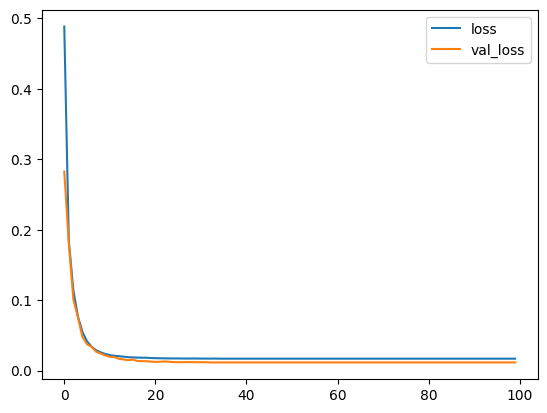

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
ypred=np.argmax(ai.predict(xtest),axis=1)

84/84 [==============================] - 0s 1ms/step


In [ ]:
ypred.shape

(2681,)

In [ ]:
ytest_true=np.argmax(ytest,axis=1)
ytest_true

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(confusion_matrix(ytest_true,ypred``))

[[2681]]


In [ ]:
x_single_prediction = np.argmax(ai.predict(xtest.iloc[1:2,:]), axis=1)


print(x_single_prediction)


print(le.inverse_transform(x_single_prediction))

1/1 [==============================] - 0s 40ms/step
[0]
['e']


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7a9e570d12d0> (for post_execute):


KeyboardInterrupt: ignored

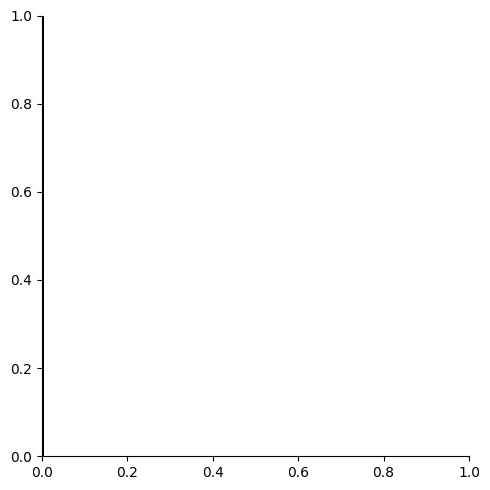

In [ ]:
sns.displot(ypred-ytest,)

In [ ]:
xtest.iloc[1,:]

cap-shape                   0.0
cap-surface                 1.0
cap-color                   2.0
bruises                     0.0
odor                        2.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   1.0
gill-color                  2.0
stalk-shape                 0.0
stalk-root                  1.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           1.0
population                  1.0
habitat                     2.0
Name: 437, dtype: float64

In [ ]:
xtest

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4,0.0,0.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
437,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
1268,0.0,0.0,2.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
6588,3.0,0.0,4.0,1.0,7.0,0.0,0.0,0.0,8.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,4.0
347,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283,3.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,8.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0,4.0
3040,0.0,1.0,1.0,1.0,4.0,0.0,0.0,1.0,3.0,0.0,...,3.0,4.0,1.0,0.0,0.0,0.0,2.0,3.0,3.0,1.0
4653,0.0,2.0,1.0,1.0,4.0,0.0,0.0,1.0,5.0,0.0,...,3.0,2.0,4.0,0.0,0.0,0.0,2.0,3.0,3.0,4.0
798,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0


In [ ]:
ai.save('mushroom.h5')

In [ ]:
with open('mushroom.pickle','wb') as fh:
  pickle.dump([xtrain,ytrain,xtest,ytest,filled_data,enc,le],fh)

In [ ]:
ai_brain=load_model('mushroom.h5')


In [ ]:
with open('mushroom.pickle','rb') as fh:
  [xtrain,ytrain,xtest,ytest,filled_data,enc,le]=pickle.load(fh)


In [ ]:
x_single_prediction = np.argmax(ai_brain.predict(xtest.iloc[1:2,:]), axis=1)

1/1 [==============================] - 0s 489ms/step


In [ ]:
print(le.inverse_transform(x_single_prediction))

['e']
